Let us import the required Libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Let us load the image and display it to verify it.

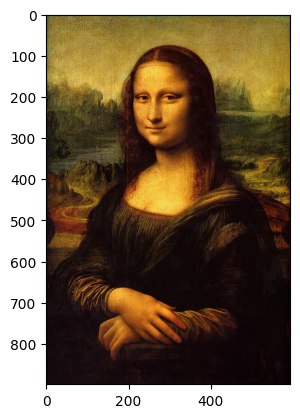

(899, 594, 3)


In [2]:
img = plt.imread('Mona_Lisa.jpg')
plt.imshow(img)
plt.show()
print(img.shape)

Let us define the function for calculating CORRELATION COEFFICIENT between 2 images.

This function returns a np array of 3 values that is Correlation across 3 channels.

In [6]:
def CorrelationCoeff(img1, img2):
    # Let us first reshape the images .
    img1_flat = img1.reshape(-1, 3)  
    img2_flat = img2.reshape(-1, 3)
    
    # Compute the means
    mean1 = np.mean(img1_flat, axis = 0) 
    mean2 = np.mean(img2_flat, axis = 0)
    
    # Compute the standard deviations
    std1 = np.std(img1_flat, axis = 0)
    std2 = np.std(img2_flat, axis = 0)
    
    # Now compute the correlation coeff.
    numerator = np.sum((img1_flat - mean1)*(img2_flat-mean2), axis = 0) 
    denominator = (img1_flat.shape[0]-1)*std1*std2 
    
    corr_coef = numerator/denominator 
    return corr_coef

Now lets compute the correlation coefficients for shifts ranging from -10 to 10.

 For 0 shift correlation will be 1.

In [7]:
CorrelationCoeffs = []
ShiftedImages = []
n = img.shape[1]
for i in range(-10,11):
    if (i==0) :
        CorrelationCoeffs.append(np.array([1, 1, 1]))
        ShiftedImages.append(img) 
        continue
    shifted_image = np.zeros_like(img)
    if(i>0):
        shifted_image[:, i:, :] = img[:, 0:(n-i), :]
    else:
        shifted_image[:, 0:(n+i), :] = img[:, -i:, :]
    
    corr_coef = CorrelationCoeff(img, shifted_image)
    
    ShiftedImages.append(shifted_image)
    CorrelationCoeffs.append(corr_coef)


Let us check whether the functions are working correctly.

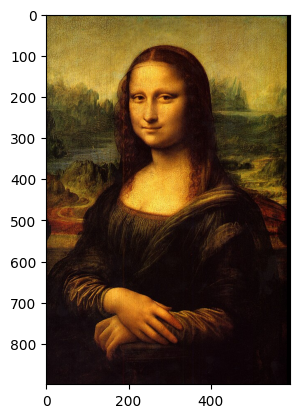

[[0.89704442 0.89151931 0.67984642]
 [0.90531776 0.89873978 0.68151846]
 [0.91352383 0.90584437 0.68230959]
 [0.92168712 0.91294329 0.68753662]
 [0.93017583 0.92035089 0.69715751]
 [0.93858209 0.92766384 0.70460074]
 [0.94673217 0.93452913 0.70623897]
 [0.95625007 0.94368606 0.72163924]
 [0.9604487  0.94528421 0.69478305]
 [0.9711811  0.95804991 0.74456342]
 [1.         1.         1.        ]
 [0.97155002 0.95837734 0.74410151]
 [0.96111676 0.94582379 0.6936956 ]
 [0.95724265 0.94445137 0.71992015]
 [0.94814823 0.93560871 0.70413149]
 [0.94035241 0.92900008 0.70190901]
 [0.93225432 0.92188789 0.69378763]
 [0.92409603 0.91473438 0.68360719]
 [0.91620982 0.90782645 0.67777448]
 [0.90821243 0.90086713 0.67618081]
 [0.90020254 0.89386084 0.67396304]]


In [8]:
CorrelationCoeffs = np.array(CorrelationCoeffs)
plt.imshow(ShiftedImages[0])
plt.show()
print(CorrelationCoeffs)

We now have all the correlation coefficients.Lets divide them into 3 parts each containing correlation coefficients for a channel among R, G, B.

In [9]:
Red_Correl_Coeffs = CorrelationCoeffs[:, 0] 
Green_Correl_Coeffs = CorrelationCoeffs[:, 1] 
Blue_Correl_Coeffs = CorrelationCoeffs[:, 2] 
shifts = np.array(range(-10, 11))


Plot for all 3 channel correlation coefficients with shift value.

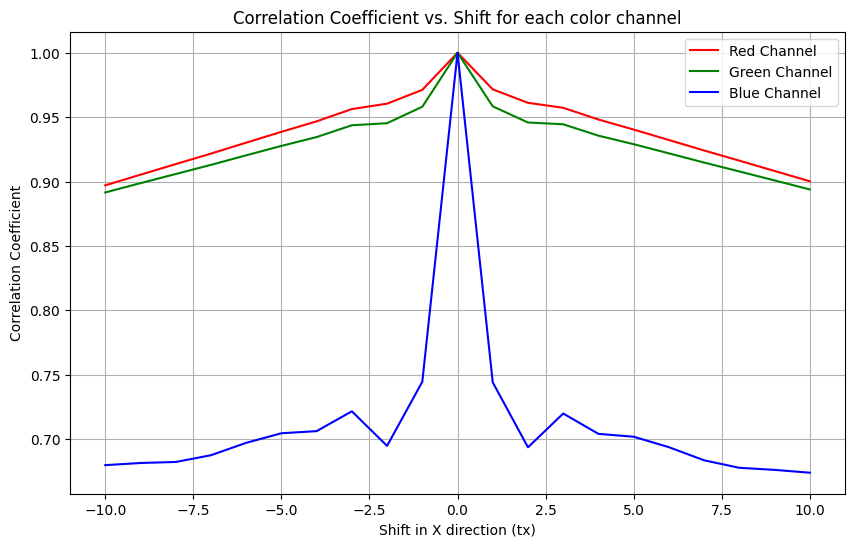

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(shifts, Red_Correl_Coeffs, label='Red Channel', color='red')
plt.plot(shifts, Green_Correl_Coeffs, label='Green Channel', color='green')
plt.plot(shifts, Blue_Correl_Coeffs , label='Blue Channel', color='blue')
plt.xlabel('Shift in X direction (tx)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs. Shift for each color channel')
plt.legend()
plt.grid(True)
plt.show()

Now we need to generate a normalized histogram for the original image. 

A normalized histogram means that the sum of the values for each bin turns out to be 1. ie Area under the plot is 1. This is done by dividing the pixel count for each bin with the Total number of pixels. Let's draw 3 histograms one for each channel.

Let us first make a function that returns us the the number of pixels for each value neatly arranged.

In [11]:
def compute_histogram(image, bins = 256): # image is of shape 2 ie only one channel
    hist = np.zeros(bins)
    
    image = image.reshape(-1)
    for pixel in image:
        pixel_index = int(pixel)
        hist[pixel_index]+=1
    
    hist = hist/(image.shape[0]) # Normalize by dividing with total pixels
    
    return hist

Computing the 3 histogram - arrays

In [12]:
red_image = img[:, :, 0]
green_image = img[:, :, 1]
blue_image = img[:, :, 2]

hist_red = compute_histogram(red_image, 256)
hist_green = compute_histogram(green_image, 256)
hist_blue = compute_histogram(blue_image, 256)


Red - Channel Histogram

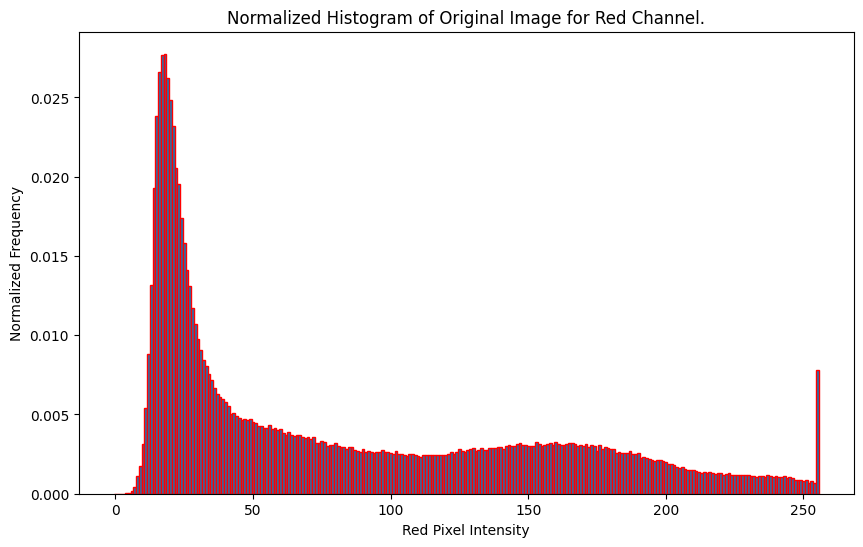

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(range(0,256), hist_red, width=1, edgecolor='red')
plt.xlabel('Red Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Original Image for Red Channel.')
plt.show()

Green-Channel Histogram

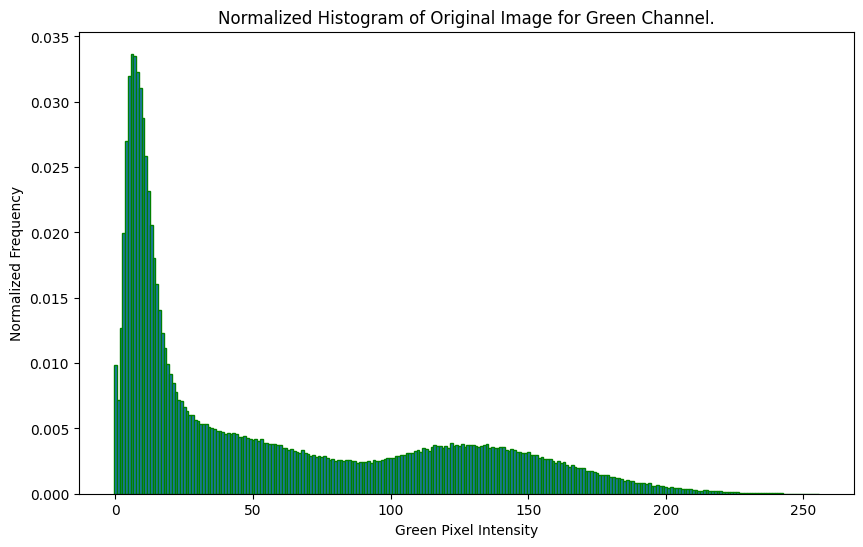

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(range(0,256), hist_green, width=1, edgecolor='green')
plt.xlabel('Green Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Original Image for Green Channel.')
plt.show()

Blue-Channel Histogram

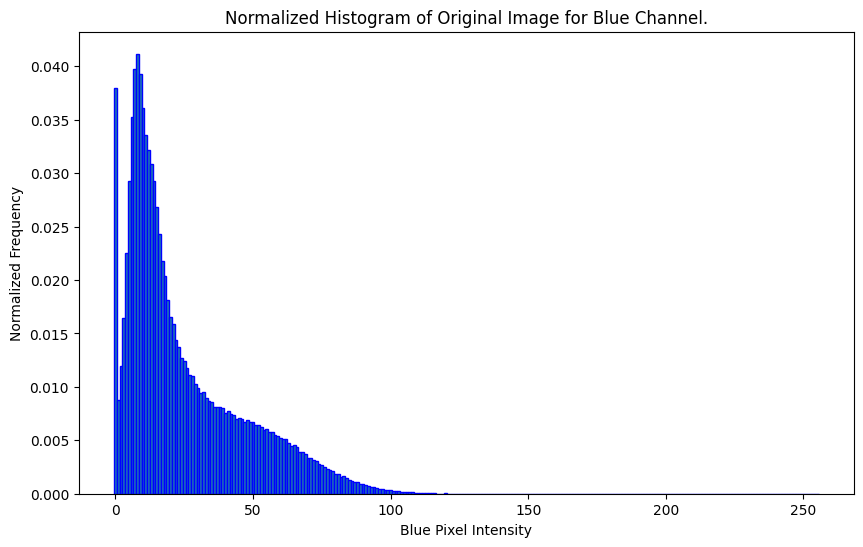

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(0,256), hist_blue, width=1, edgecolor='blue')
plt.xlabel('Blue Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Original Image for Blue Channel.')
plt.show()